In [41]:
# Data Handling
import pandas as pd
import numpy as np
#  Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing (encoding, scaling)
from sklearn.preprocessing import StandardScaler
# Utilities
import warnings
warnings.filterwarnings("ignore")

In [42]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mobile-device-usage-and-user-behavior-dataset' dataset.
Path to dataset files: /kaggle/input/mobile-device-usage-and-user-behavior-dataset


In [43]:
m_d = pd.read_csv(path + "/user_behavior_dataset.csv")
m_d = m_d.drop(columns=["User Behavior Class"])

In [44]:
m_d.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [45]:
m_d.shape

(700, 10)

In [46]:
m_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [47]:
m_d.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [48]:
m_d = m_d.dropna()

In [49]:
m_d.duplicated().sum()

np.int64(0)

In [50]:
m_d = m_d.drop_duplicates()

In [51]:
m_d.dtypes

,0
User ID,int64
Device Model,object
Operating System,object
App Usage Time (min/day),int64
Screen On Time (hours/day),float64
Battery Drain (mAh/day),int64
Number of Apps Installed,int64
Data Usage (MB/day),int64
Age,int64
Gender,object


In [52]:
m_d.columns.tolist()

['User ID',
 'Device Model',
 'Operating System',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'Gender']

In [53]:
m_d = m_d.rename(columns={
    'User ID': 'user_id',
    'Device Model': 'device_model',
    'Operating System': 'os',
    'App Usage Time (min/day)': 'app_usage_min',
    'Screen On Time (hours/day)': 'screen_on_hours',
    'Battery Drain (mAh/day)': 'battery_drain',
    'Number of Apps Installed': 'apps_installed',
    'Data Usage (MB/day)': 'data_usage_mb',
    'Age': 'age',
    'Gender': 'gender'
})


In [54]:
m_d.dtypes

,0
user_id,int64
device_model,object
os,object
app_usage_min,int64
screen_on_hours,float64
battery_drain,int64
apps_installed,int64
data_usage_mb,int64
age,int64
gender,object


In [55]:
m_d.to_csv("clean_data.csv", index=False)

In [56]:
plt.rcParams['figure.figsize'] = (12, 8)

In [57]:
m_d.describe()

,user_id,app_usage_min,screen_on_hours,battery_drain,apps_installed,data_usage_mb,age
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


In [68]:
numeric_cols = ['app_usage_min', 'screen_on_hours', 'battery_drain',
                'apps_installed', 'data_usage_mb', 'age']


1. How do the average usage metrics (App Time, Data Usage, Battery Drain)?

In [58]:
print("AVERAGE USAGE METRICS")
avg_metrics = m_d[['app_usage_min', 'data_usage_mb', 'battery_drain', 'screen_on_hours', 'apps_installed']].mean()
avg_metrics = avg_metrics.round(2)
print(avg_metrics)

AVERAGE USAGE METRICS
app_usage_min       271.13
data_usage_mb       929.74
battery_drain      1525.16
screen_on_hours       5.27
apps_installed       50.68
dtype: float64


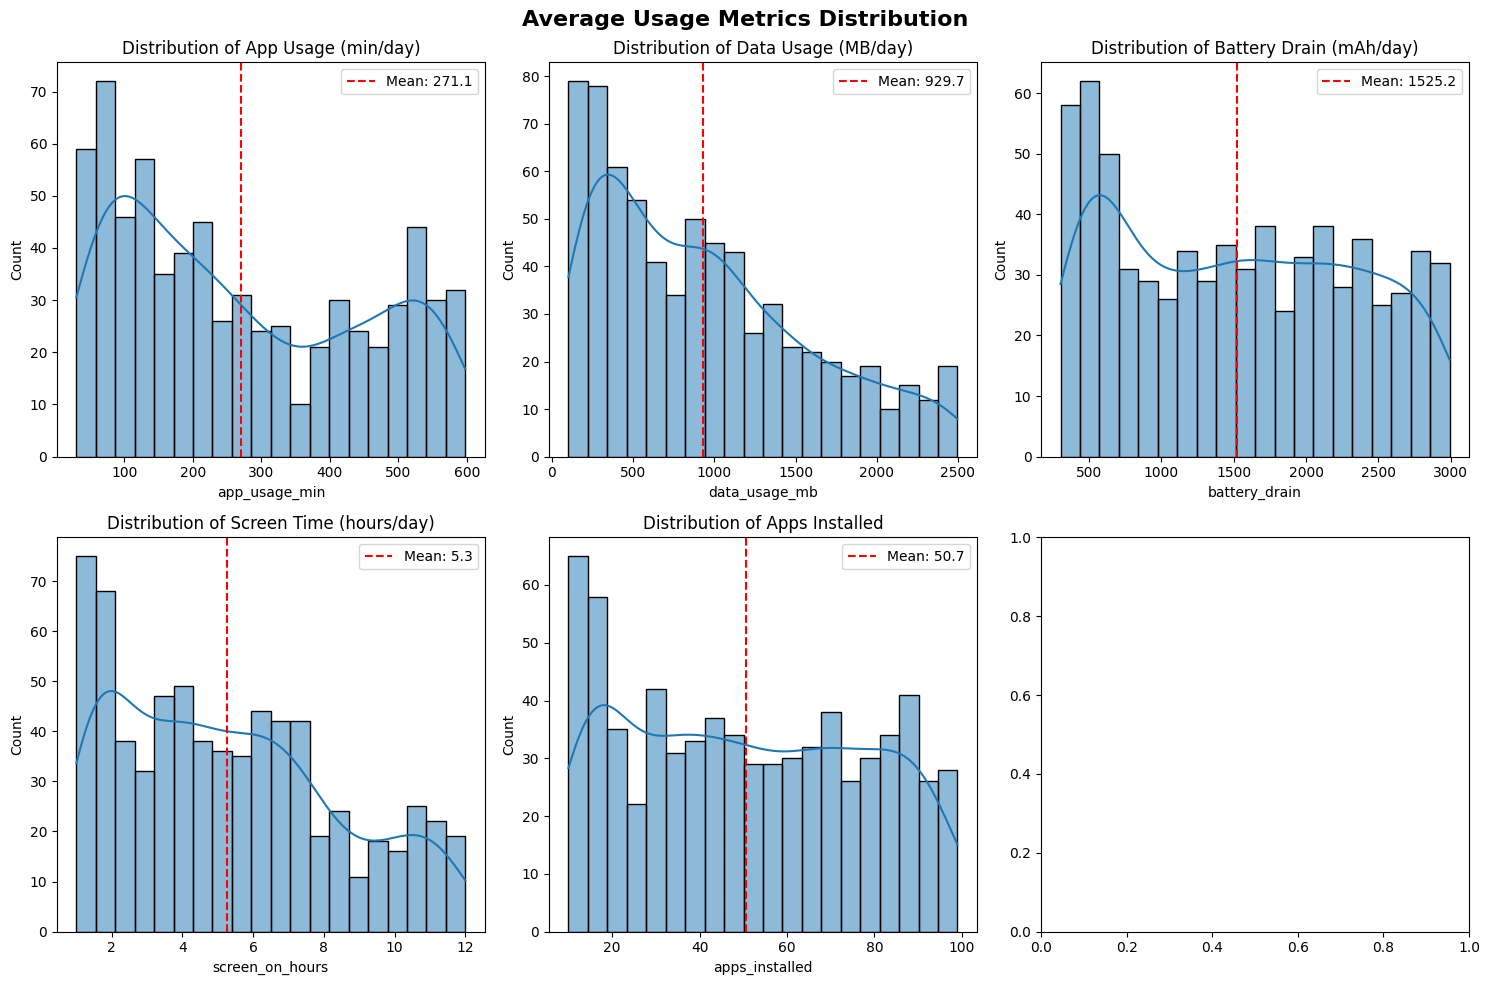

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Average Usage Metrics Distribution', fontsize=16, fontweight='bold')

metrics_to_plot = ['app_usage_min', 'data_usage_mb', 'battery_drain', 'screen_on_hours', 'apps_installed']
titles = ['App Usage (min/day)', 'Data Usage (MB/day)', 'Battery Drain (mAh/day)',
          'Screen Time (hours/day)', 'Apps Installed']

for i, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    ax = axes[i//3, i%3]
    sns.histplot(m_d[metric], kde=True, ax=ax, bins=20)
    ax.axvline(m_d[metric].mean(), color='red', linestyle='--', label=f'Mean: {m_d[metric].mean():.1f}')
    ax.set_title(f'Distribution of {title}')
    ax.legend()

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Screen On Time (hours/day)')

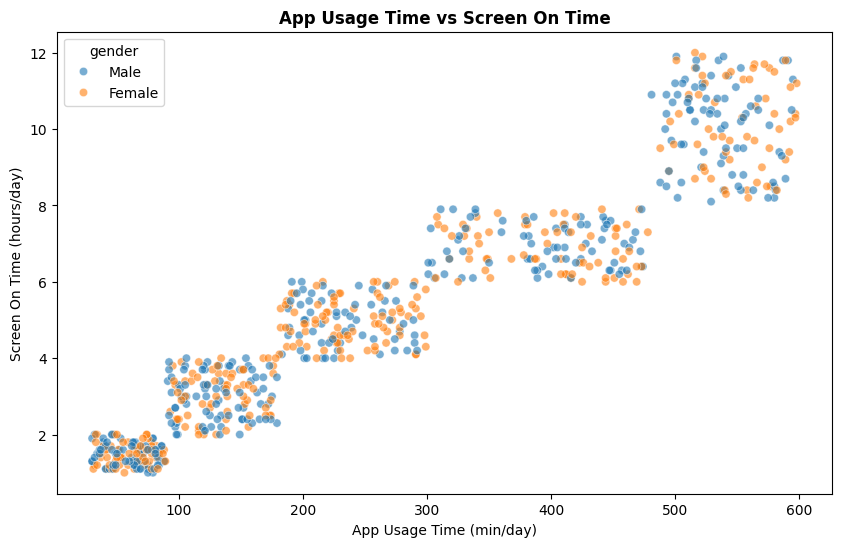

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=m_d, x='app_usage_min', y='screen_on_hours', hue='gender', alpha=0.6)
plt.title('App Usage Time vs Screen On Time', fontweight='bold')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')

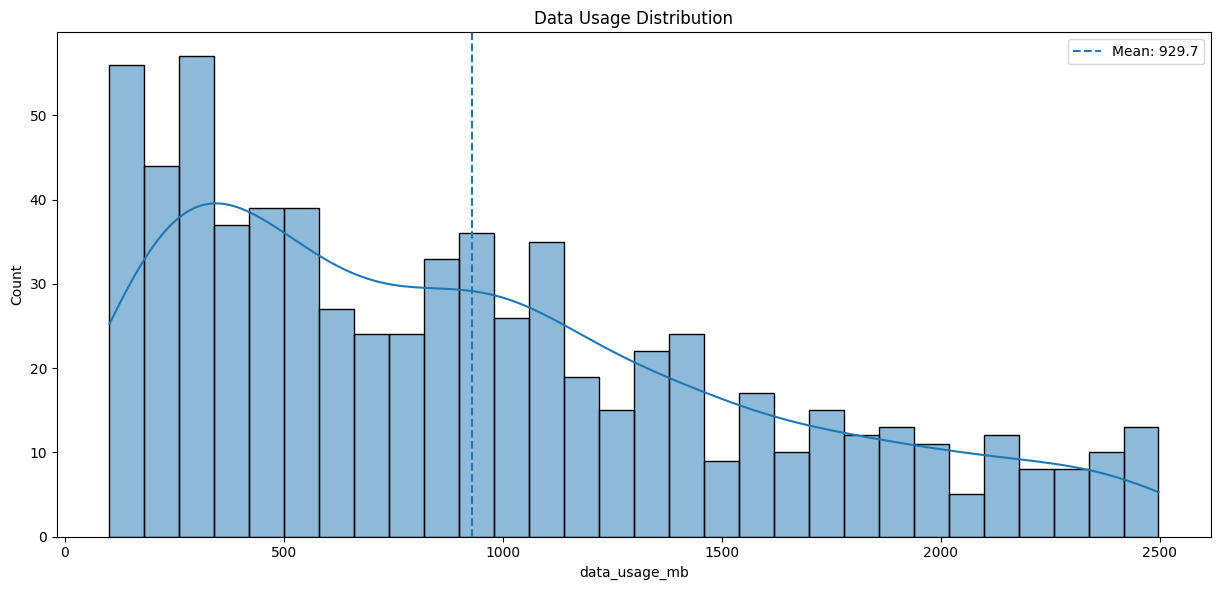

Number of data usage outliers: 0
Outlier range: < -1079.0 MB or > 2793.0 MB


In [61]:
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 2)
sns.histplot(m_d['data_usage_mb'], kde=True, bins=30)
plt.axvline(m_d['data_usage_mb'].mean(), linestyle='--', label=f'Mean: {m_d["data_usage_mb"].mean():.1f}')
plt.title('Data Usage Distribution')
plt.legend()

plt.tight_layout()
plt.show()
# Identify outliers using IQR method
Q1 = m_d['data_usage_mb'].quantile(0.25)
Q3 = m_d['data_usage_mb'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = m_d[(m_d['data_usage_mb'] < lower_bound) | (m_d['data_usage_mb'] > upper_bound)]
print(f"Number of data usage outliers: {len(outliers)}")
print(f"Outlier range: < {lower_bound:.1f} MB or > {upper_bound:.1f} MB")


=== AGE TREND IN APPS INSTALLED ===


Text(0, 0.5, 'Number of Apps Installed')

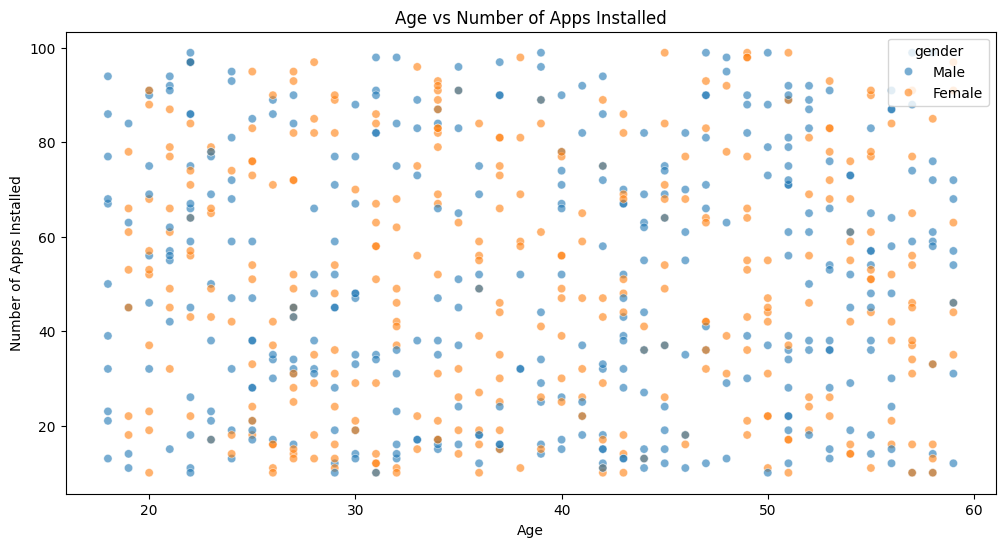

In [62]:
print("\n=== AGE TREND IN APPS INSTALLED ===")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=m_d, x='age', y='apps_installed',hue='gender',alpha=0.6)
plt.title('Age vs Number of Apps Installed')
plt.xlabel('Age')
plt.ylabel('Number of Apps Installed')


=== APPS INSTALLED vs Screen On Time (hours/day) ===
Correlation coefficient: 0.947


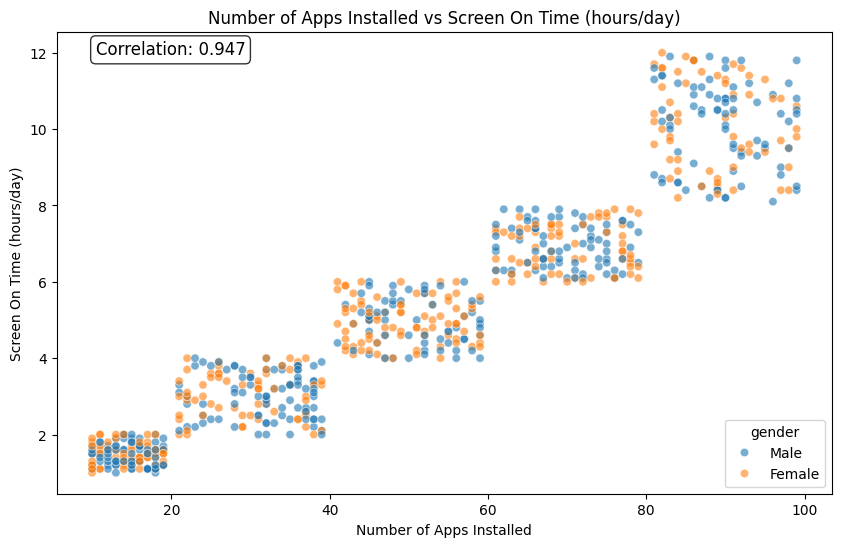

In [63]:
print("\n=== APPS INSTALLED vs Screen On Time (hours/day) ===")
apps_usage_corr = m_d['apps_installed'].corr(m_d['screen_on_hours'])
print(f"Correlation coefficient: {apps_usage_corr:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=m_d, x='apps_installed', y='screen_on_hours',hue='gender', alpha=0.6)
plt.title('Number of Apps Installed vs Screen On Time (hours/day)')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Screen On Time (hours/day)')

# Add correlation text
plt.text(0.05, 0.95, f'Correlation: {apps_usage_corr:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.show()



=== BATTERY DRAIN: iOS vs ANDROID ===
                mean         std  count
os                                     
Android  1508.198556  819.547037    554
iOS      1589.513699  817.175980    146


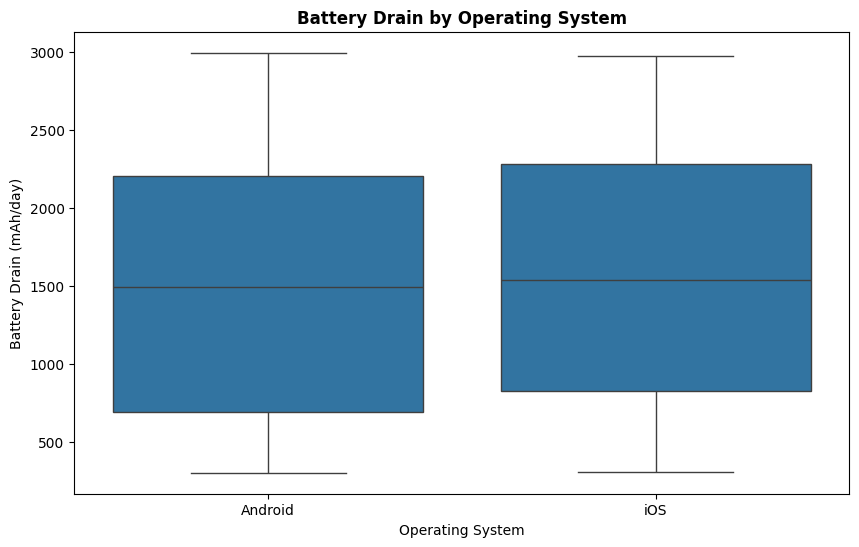

In [64]:
print("\n=== BATTERY DRAIN: iOS vs ANDROID ===")
battery_by_os = m_d.groupby('os')['battery_drain'].agg(['mean', 'std', 'count'])
print(battery_by_os)

plt.figure(figsize=(10, 6))
sns.boxplot(data=m_d, x='os', y='battery_drain')
plt.title('Battery Drain by Operating System', fontweight='bold')
plt.xlabel('Operating System')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()


=== SCREEN TIME: iOS vs ANDROID ===
            mean       std  count
gender                           
Female  5.261310  2.980182    336
Male    5.283242  3.152046    364


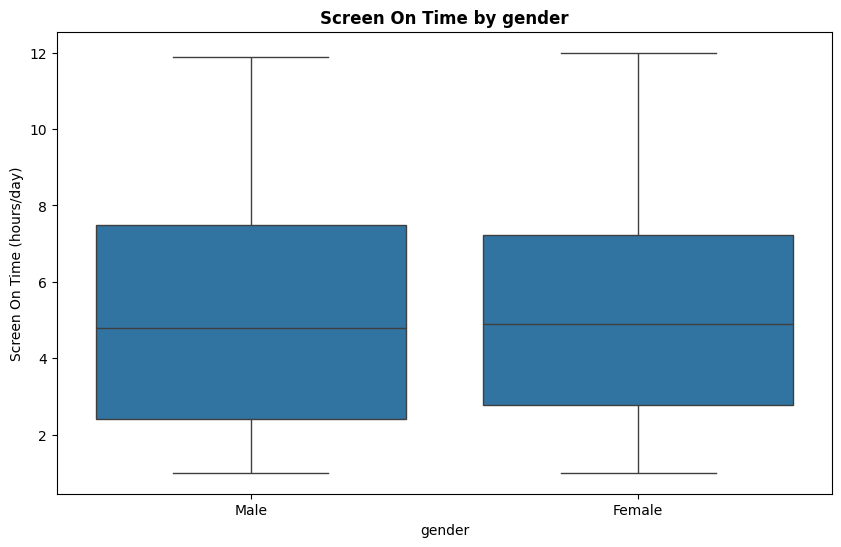

In [65]:
screen_time_by_gender = m_d.groupby('gender')['screen_on_hours'].agg(['mean', 'std', 'count'])
print(screen_time_by_gender)

plt.figure(figsize=(10, 6))
sns.boxplot(data=m_d, x='gender', y='screen_on_hours')
plt.title('Screen On Time by gender', fontweight='bold')
plt.xlabel('gender')
plt.ylabel('Screen On Time (hours/day)')
plt.show()



=== GENDER DIFFERENCES IN APP USAGE ===
              mean         std  count
gender                               
Female  271.967262  174.232669    336
Male    270.354396  180.130832    364


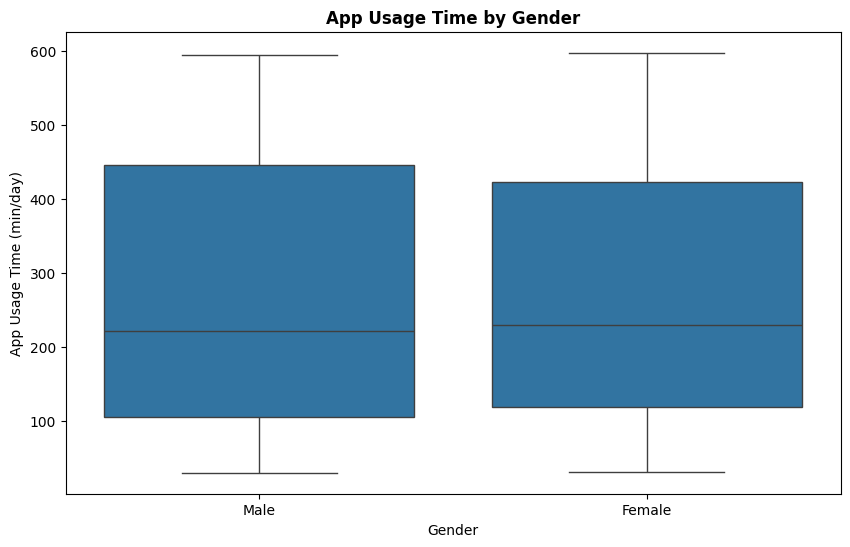

In [66]:
usage_by_gender = m_d.groupby('gender')['app_usage_min'].agg(['mean', 'std', 'count'])
print(usage_by_gender)

plt.figure(figsize=(10, 6))
sns.boxplot(data=m_d, x='gender', y='app_usage_min')
plt.title('App Usage Time by Gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('App Usage Time (min/day)')
plt.show()


=== DATA USAGE BY AGE ===


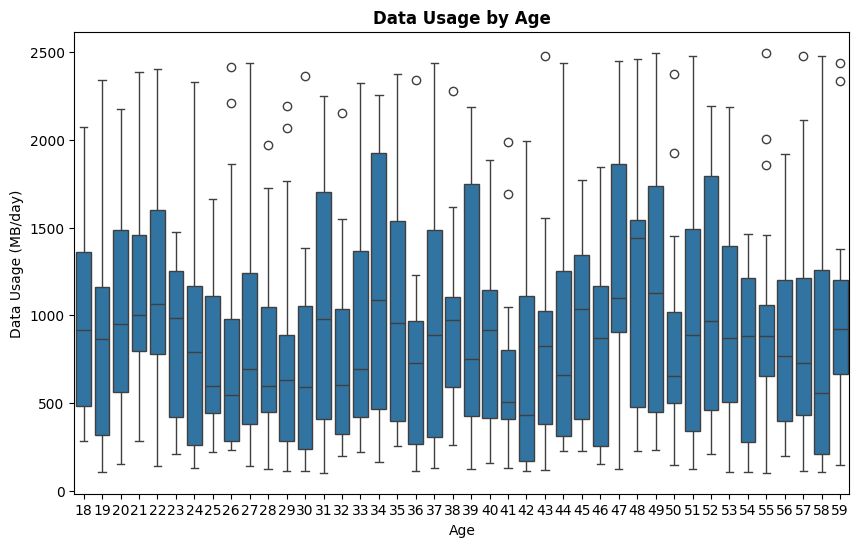


=== SCREEN ON TIME BY AGE ===


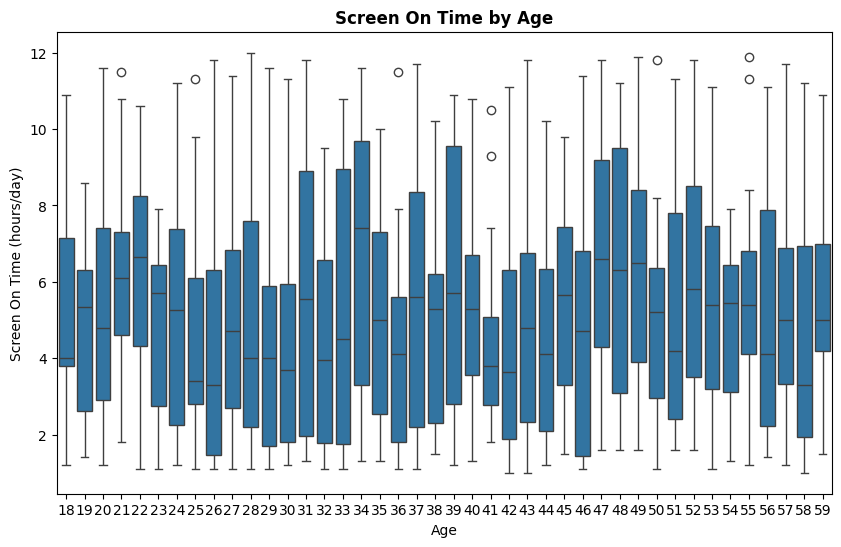

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=m_d, x='age', y='data_usage_mb')
plt.title('Data Usage by Age', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=m_d, x='age', y='screen_on_hours')
plt.title('Screen On Time by Age', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Screen On Time (hours/day)')
plt.show()


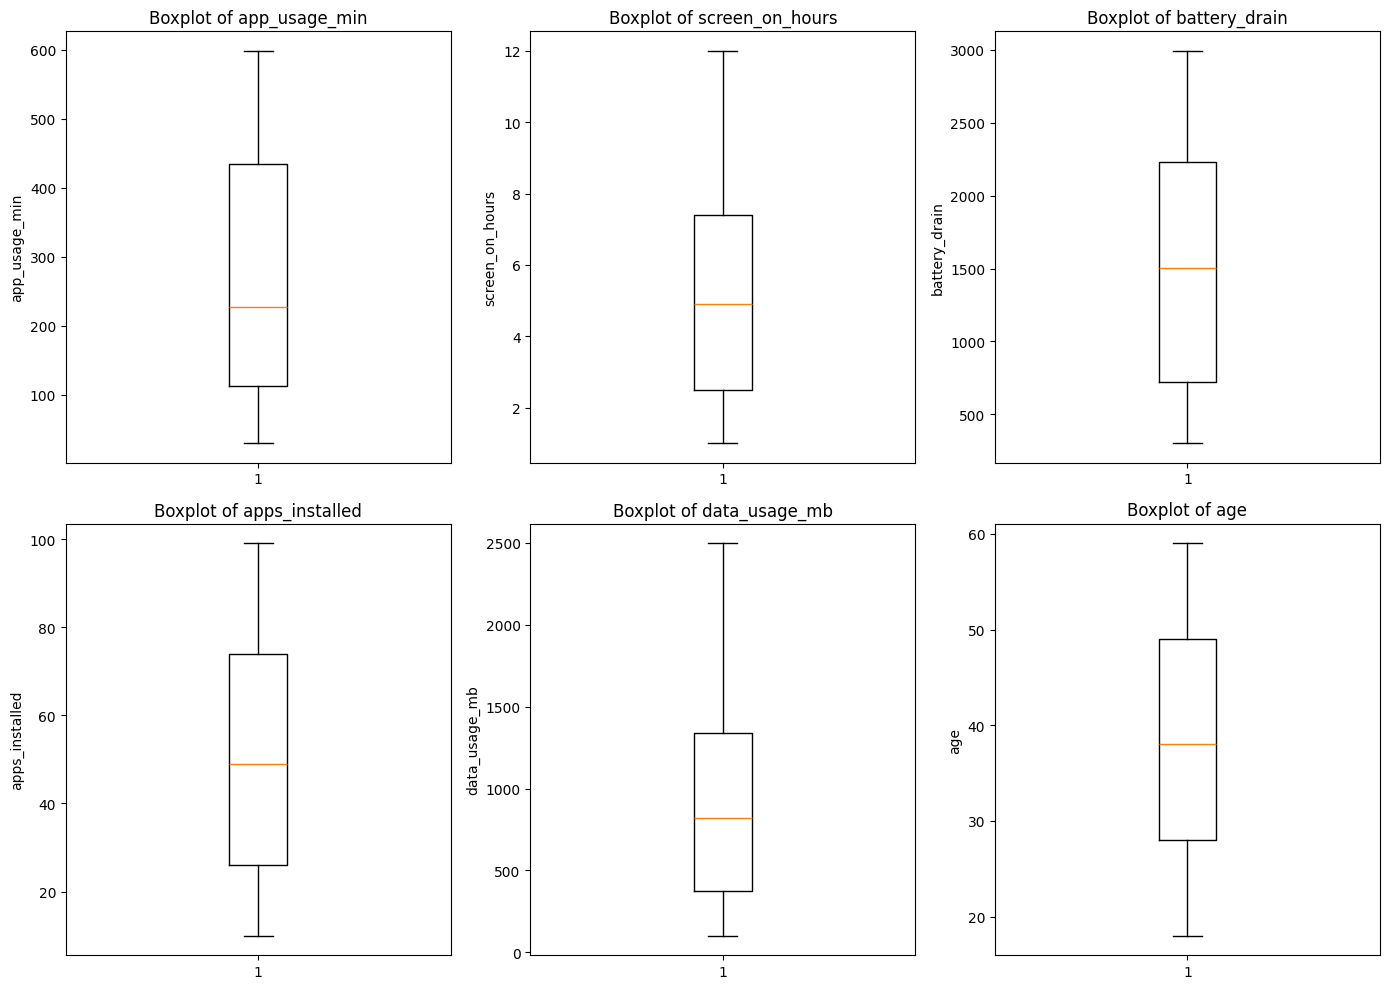

In [80]:
# Create a boxplot for each numeric column
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(m_d[col], vert=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [69]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper



=== DEVICE MODELS BY GENDER ===
Gender distribution by top device models (%):
gender              Female   Male
device_model                     
Google Pixel 5       48.59  51.41
OnePlus 9            45.86  54.14
Samsung Galaxy S21   40.60  59.40
Xiaomi Mi 11         53.42  46.58
iPhone 12            50.68  49.32


<Figure size 1200x800 with 0 Axes>

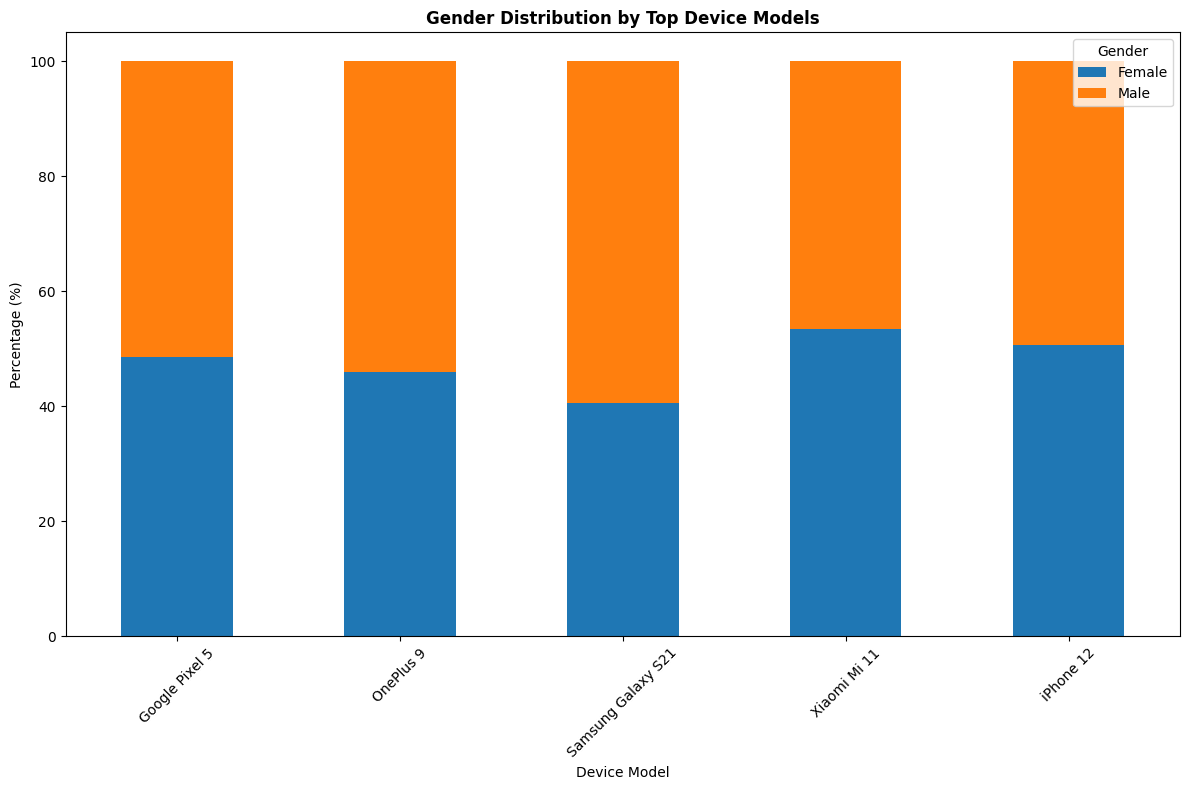

In [71]:
print("\n=== DEVICE MODELS BY GENDER ===")
# Get top device models
top_devices = m_d['device_model'].value_counts().head(10).index
m_d_top_devices = m_d[m_d['device_model'].isin(top_devices)]

# Create cross-tabulation
device_gender_ct = pd.crosstab(m_d_top_devices['device_model'], m_d_top_devices['gender'], normalize='index') * 100
print("Gender distribution by top device models (%):")
print(device_gender_ct.round(2))

plt.figure(figsize=(12, 8))
device_gender_ct.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Top Device Models', fontweight='bold')
plt.xlabel('Device Model')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== COMPREHENSIVE CORRELATION ANALYSIS ===


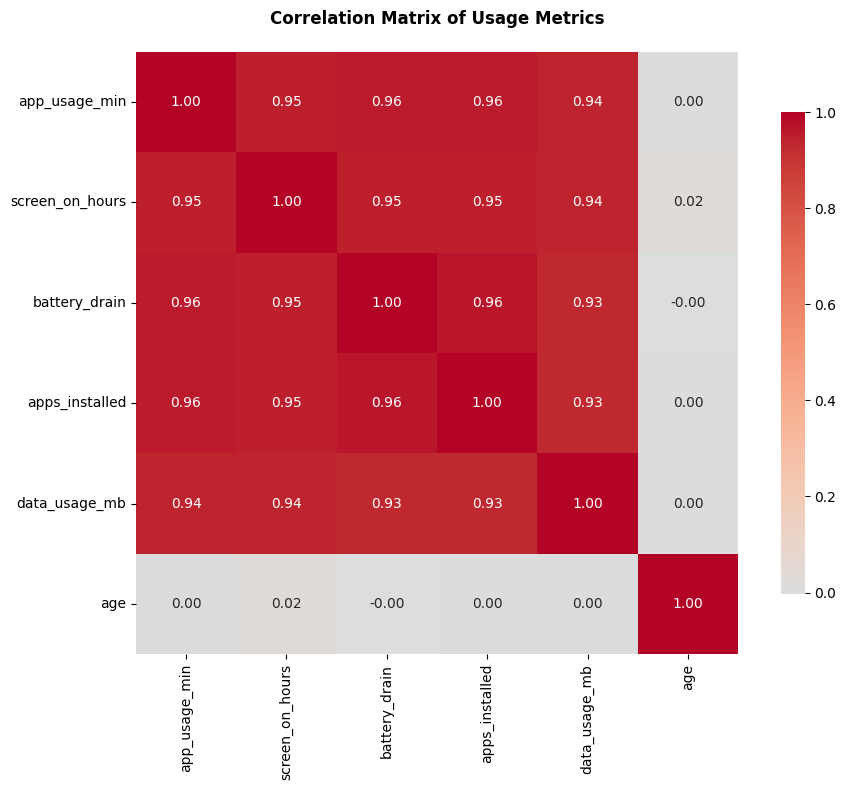

In [72]:
print("\n=== COMPREHENSIVE CORRELATION ANALYSIS ===")
numeric_cols = ['app_usage_min', 'screen_on_hours', 'battery_drain', 'apps_installed', 'data_usage_mb', 'age']
correlation_matrix = m_d[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Usage Metrics', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


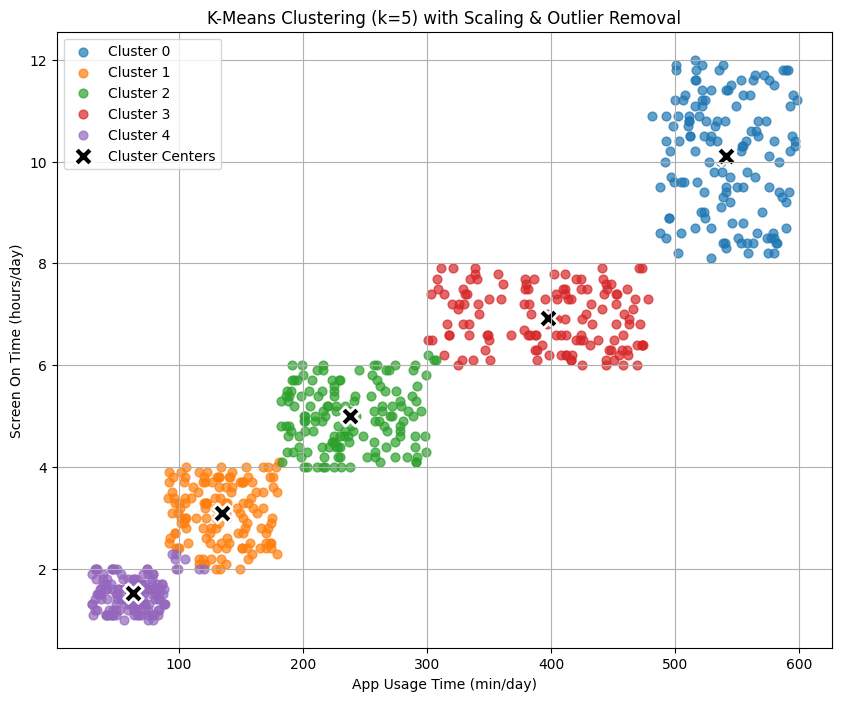

In [77]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = m_d[['app_usage_min', 'screen_on_hours']]

# Scaling (Important)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Choose k (Change based on Elbow Result)
k = 5

kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
m_d['cluster'] = kmeans.fit_predict(X_scaled)

centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

#Plot Final K-Means Result
plt.figure(figsize=(10, 8))

for i in range(k):
    plt.scatter(
        m_d[m_d['cluster'] == i]['app_usage_min'],
        m_d[m_d['cluster'] == i]['screen_on_hours'],
        s=40, alpha=0.7, label=f'Cluster {i}'
    )

#Plot cluster centers
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='black', marker='X', s=200, edgecolor='white', linewidths=2,
    label='Cluster Centers'
)

plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.title(f'K-Means Clustering (k={k}) with Scaling & Outlier Removal')
plt.legend()
plt.grid(True)
plt.show()
